In [1]:
import shap
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
X_train_data = pd.read_csv('data/X_train.csv',index_col=0,header=0)
X_train = X_train_data
features = X_train.columns
X_test_data = pd.read_csv('data/X_test.csv',index_col=0,header=0)
X_test = X_test_data
y_train_data = pd.read_csv('data/y_train.csv',index_col=None,header=0)
y_train = y_train_data.values.ravel()
y_test_data = pd.read_csv('data/y_test.csv',index_col=None,header=0)
y_test = y_test_data.values.ravel()

para = {'max_depth': 3, 'splitter': 'random'}
clf = DecisionTreeRegressor(random_state=0)
clf.set_params(**para)
clf.fit(X_train,y_train)
clf.predict(X_test)
explainer = shap.TreeExplainer(clf)

['FP_340', 'FP_339', 'FP_330', 'FP_338', 'FP_336', 'FP_335', 'FP_334', 'FP_333', 'FP_332', 'FP_337', 'FP_1024', 'FP_531', 'FP_727', 'Hardness (eV)', 'RP']


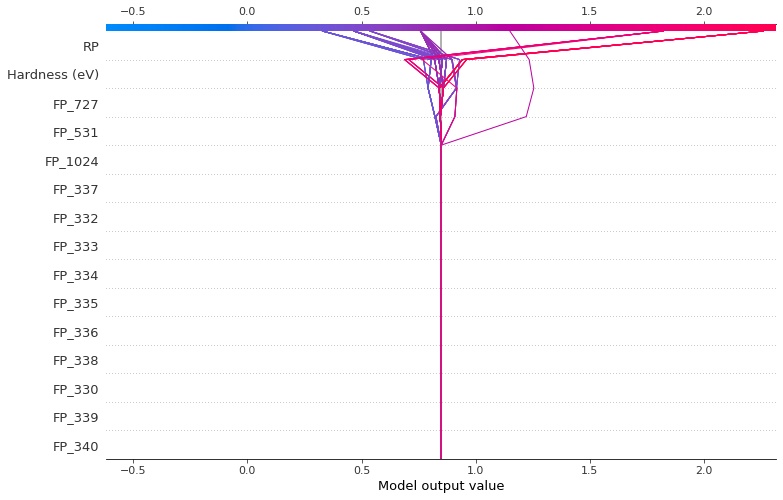

In [3]:
# 整体样本
X = pd.concat([X_train,X_test])
shap_values = explainer.shap_values(X)
shap.decision_plot(explainer.expected_value, shap_values,
                   X,show=False,feature_display_range=slice(-1, -16, -1))# 预测为1的类别
# 从图的下往上看就是每个样本从0.5左右的基线，偏移到0或者1的过程

fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(12)
ax = plt.gca()
#ax.set_xlabel(fontsize=16)
# ax.set_ylabel('Inputparameter', fontsize=16)
ylabels = [tick.get_text() for tick in ax.get_yticklabels()]
print(ylabels)
# ylabels[-7] = 'Softness (eV$^{-1})$'
ax.set_yticklabels(ylabels)
plt.savefig('shap_feature_decision_plot.png',dpi=600)

FixedFormatter should only be used together with FixedLocator


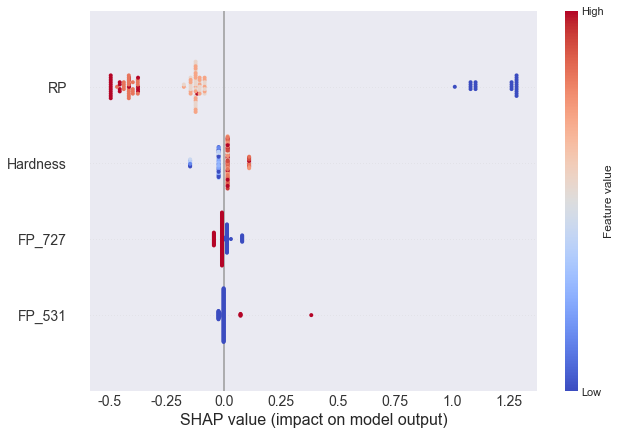

In [58]:
shap_values = explainer.shap_values(X)
plt.style.use('seaborn-dark')
shap.summary_plot(shap_values, X,show=False,max_display=4,cmap='coolwarm') 
fig = plt.gcf()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = plt.gca()
ax.set_xlabel('SHAP value (impact on model output)',fontsize=16)
# ax.set_ylabel('Features', fontsize=16)
ylabels = [tick.get_text() for tick in ax.get_yticklabels()]
ylabels[-2] = 'Hardness'
#ylabels[-7] = 'Softness (eV$^{-1})$'
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_xticklabels(np.arange(-0.75,1.5,0.25), fontsize=14)
plt.savefig('shap_feature_summary.png',dpi=800)

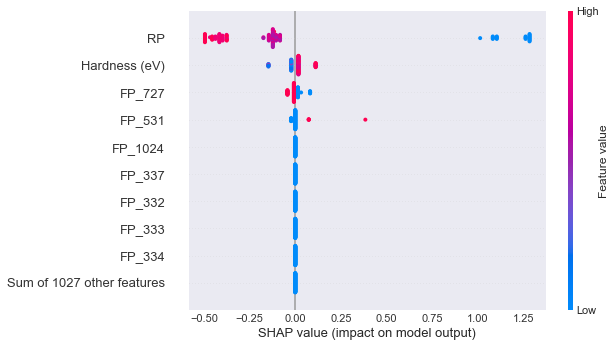

<Figure size 432x288 with 0 Axes>

In [60]:
explainer = shap.Explainer(clf, X)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=10)

plt.savefig('shap_feature_beeswarm.png',dpi=600)

In [59]:
shap.plots.bar(shap_values, max_display=10)

AssertionError: You must pass an Explanation object, Cohorts object, or dictionary to bar plot!